In [2]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

In [4]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))
previous_file_idx = -1
TOTAL_NUM_DAYS = len(daydic)

In [5]:
max_age = 0
for e in eddies:
    if eddies[e].iloc[0]['Age'] > max_age:
        oldest_eddy = e
        max_age = eddies[e].iloc[0]['Age']

print(max_age)
print(oldest_eddy)

482.0
Eddy790


In [6]:
old_eddies = []
for e in eddies:
    if eddies[e].iloc[0]['Age'] > 100:
        old_eddies.append(e)


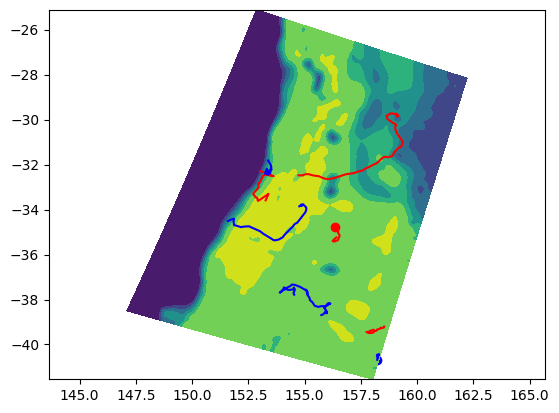

In [22]:
import matplotlib.pyplot as plt

for e in range (10,18):
    edata = eddies['Eddy'+str(e)]
    
    plt.contourf(lon_rho,lat_rho,h)
    ecolor = 'red' if edata.Vort.iloc[0] > 0 else 'blue'
    plt.plot(edata.Lon, edata.Lat, color=ecolor)
    plt.scatter(edata.Lon.iloc[-1], edata.Lat.iloc[-1], color=ecolor)
    plt.axis('equal')

In [11]:
edata

,Lon,Lat,Vort,Id,Age
Day1,157.131974,-32.627830,-0.000039,19.0,75
Day2,157.211777,-32.558455,-0.000038,19.0,75
Day3,157.259161,-32.502614,-0.000033,19.0,75
Day4,157.389785,-32.448894,-0.000034,19.0,75
Day5,157.440631,-32.464508,-0.000035,19.0,75
...,...,...,...,...,...
Day71,154.914211,-30.075184,-0.000021,19.0,75
Day72,154.813996,-29.996181,-0.000020,19.0,75
Day73,154.718140,-29.918510,-0.000020,19.0,75
Day74,154.739374,-29.782840,-0.000017,19.0,75
